In [17]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from sklearn import decomposition
%matplotlib inline

youtube video used 
[link](https://www.youtube.com/watch?v=PJ5xXXcfuTc)

In [18]:
#load the video into a matrix
videoarr = np.zeros((200,360,640),dtype=np.float32)
cap = cv2.VideoCapture('Alibi ALI-IPU3030RV IP Camera Highway Surveillance-PJ5xXXcfuTc.mp4')
i = 0
while(cap.isOpened()):
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    if i >= 100 and i%10==0:
        videoarr[(i//10-100)] = gray
    i += 1
    if i - 100 == 1999:
        break
videoarr = np.reshape(videoarr,(videoarr.shape[0],-1)).T
print(np.sum(videoarr))

2099
4717285000.0


In [29]:
#decribe the video arr using pandas
fr = pd.DataFrame(videoarr[:,0:10])
print(fr.shape)
fr.describe()

(230400, 10)


,0,1,2,3,4,5,6,7,8,9
count,230400.000000,230400.000000,230400.000000,230400.000000,230400.000000,230400.000000,230400.000000,230400.000000,230400.000000,230400.000000
mean,116.766373,116.104027,115.622086,115.031181,115.457222,115.820518,116.215935,116.092255,115.469772,115.918541
std,70.358948,70.016869,70.499664,71.124809,70.762840,70.436096,70.073204,70.196426,70.927353,70.761444
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,74.000000,73.000000,71.000000,73.000000,73.000000,73.000000,73.000000,72.000000,72.000000
50%,87.000000,86.000000,86.000000,86.000000,86.000000,87.000000,87.000000,86.000000,86.000000,86.000000
75%,137.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,136.000000,137.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [20]:
np.save("video_matrix.npy", videoarr)
#save the videoarr so we can load it later

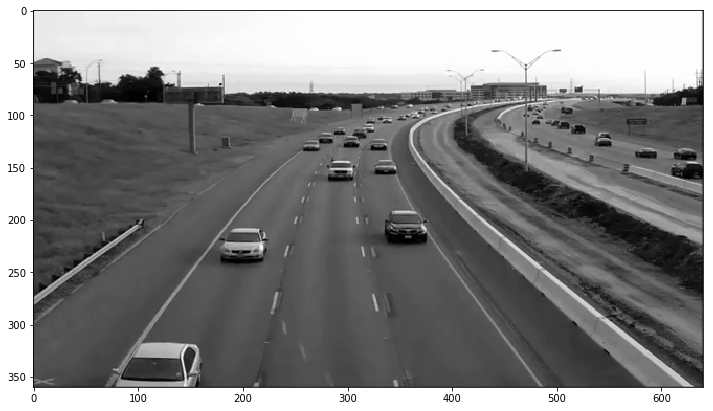

In [22]:
#plot a instance of video
plt.figure(figsize=(12, 12))
plt.imshow(videoarr[:,23].reshape((360,640)), cmap='gray')
plt.show()

In [23]:
#do SVD (one line)
u, s, v = decomposition.randomized_svd(videoarr, 2)

In [24]:
u.shape, s.shape, v.shape

((230400, 2), (2,), (2, 200))

In [25]:
low_rank = u @ np.diag(s) @ v
low_rank.shape
#low_rank matrix has the background 

(230400, 200)

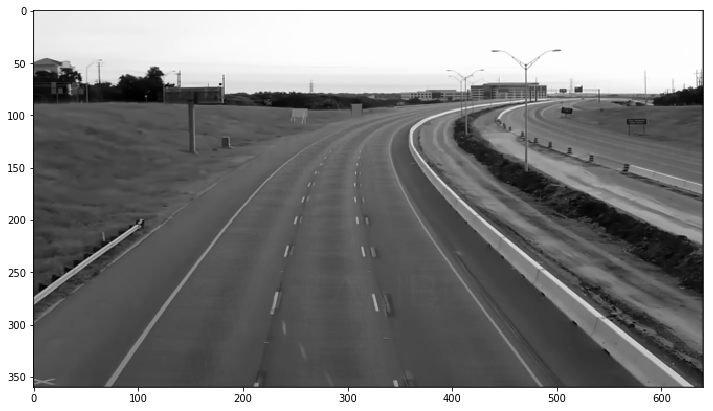

In [26]:
#plot the background
plt.figure(figsize=(12, 12))                  
plt.imshow(low_rank[:,0].reshape((360,640)) , cmap='gray')
plt.show()

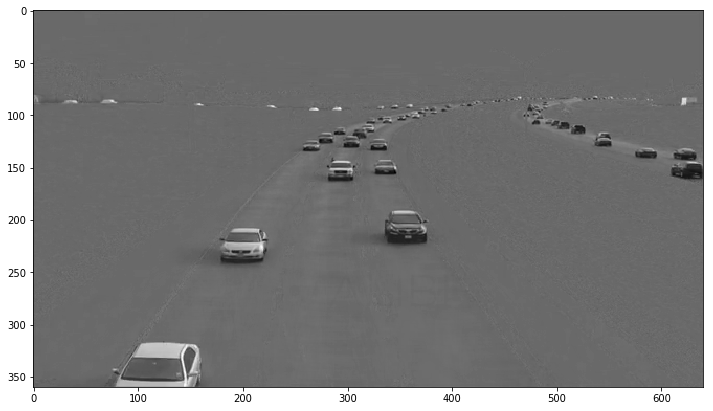

In [27]:
# subtract the background
plt.figure(figsize=(12, 12))                  
plt.imshow(videoarr[:,23].reshape((360,640)) - low_rank[:,0].reshape((360,640)) , cmap='gray')
plt.show()